Buck Converter Power Stage Transfer Function
============================================
***With Peak Current-Mode Control***


# Table of Contents

- [Initializations](#Initializations)
- [Prerequisites](#Prerequisites)
- [Definitions](#Definitions)
- [Transfer_functions](#Transfer_functions)
  - [DC_gain](#DC_gain)
  - [Low-frequency_pole](#Low-frequency_pole)
  - [Output_capacitor_zero](#Output_capacitor_zero)
  - [High-frequency_poles](#High-frequency_poles)
- [Control-to-output_transfer_function](#Control-to-output_transfer_function)
- [Appendix_A-Richtek_AN028_Example](#Appendix_A-Richtek_AN028_Example)

# Initializations

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as ct

import warnings
warnings.filterwarnings('ignore')

# Prerequisites

Buck converter with peak current mode control.

D calculation below holds only for continuous conduction mode.

# Definitions

In [2]:
V_IN = 12                         # [V], input voltage
V_OUT = 3.3                       # [V], output voltage
I_LOAD = 1                        # [A], load current
R_LOAD = V_OUT/I_LOAD             # [Ω], load resistance
F_SW = 300e3                      # [Hz], switch frequency
T_SW = 1/F_SW                     # [s], switch period
D = V_OUT/V_IN                    # Steady-state duty cycle

# COMPONENTS
L = 15e-6                         # [H], switch inductor inductance
C_OUT = 47e-6                     # [F], output capacitor capacitance
R_C = 5e-3                        # [Ω], output capacitor ESR
R_SENSE = 0.1                     # [Ω], switch current sense reistance

# SLOPE COMPENSATION
S_N = (V_IN-V_OUT)*R_SENSE / L    # Inductor current slope during on-time
S_E = 0                           # External slope compensation
m_C = 1 + S_E/S_N                 # Slope compensation factor

# Transfer_functions

In [3]:
s = ct.tf('s')

## DC_gain

$$H_{DC} = \frac{R_{LOAD}}{R_{SENSE}} \cdot \frac{1}{1 + \frac{R_{LOAD} T_{SW}}{L} \left( m_{C} (1-D) - 0.5 \right) }$$

In [4]:
H_DC = R_LOAD/R_SENSE * 1 / (1 + R_LOAD*T_SW/L * (m_C*(1-D) - 0.5))
print("H_DC = {0:1.3g} dB".format(20*np.log10(H_DC)))

H_DC = 29 dB


## Low-frequency_pole
Transfer function:

$$ H_P(s) = \frac{1}{1 + \frac{s}{\omega_P}}$$

Low frequency dominant pole:

$$ \omega_P = \frac{1}{R_{LOAD} C_{OUT}} + \frac{T_{SW}}{LC_{OUT}} \left( m_C(1-D) - 0.5 \right)$$

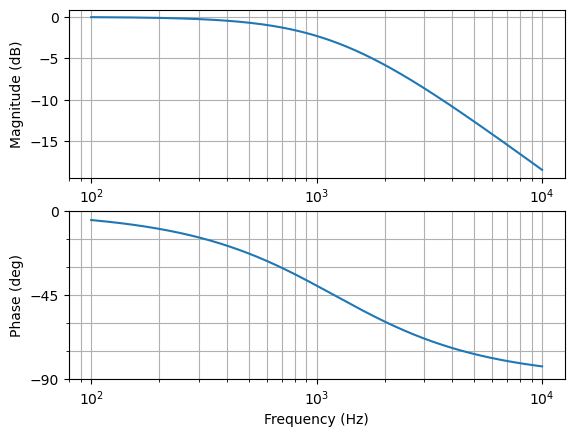

In [5]:
omega_P = 1 / (R_LOAD*C_OUT) + T_SW/(L*C_OUT) *  (m_C*(1-D)-0.5)
H_P = 1 / (1 + s/omega_P)
Gmag, Gphase, Gomega = ct.bode_plot(H_P, dB = True, Hz = True)

In [6]:
print("f_P = {0:1.3g} Hz".format(1/(2*np.pi) * omega_P))

f_P = 1.2e+03 Hz


## Output_capacitor_zero

Transfer function:

$$ H_Z(s) = 1 + \frac{s}{\omega_Z}$$

Output capacitor zero:

$$ \omega_Z = \frac{1}{R_C C_{OUT}}$$

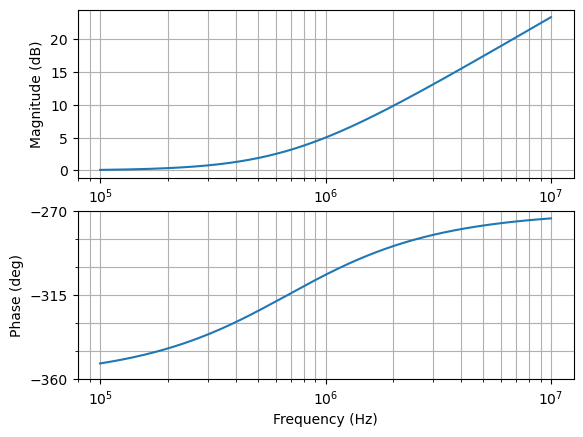

In [7]:
omega_Z = 1 / (R_C * C_OUT)
H_Z = 1 + s/omega_Z
Gmag, Gphase, Gomega = ct.bode_plot(H_Z, dB = True, Hz = True)

In [8]:
print("f_P = {0:1.3g} Hz".format(1/(2*np.pi) * omega_Z))

f_P = 6.77e+05 Hz


## High-frequency_poles

Transfer function:

$$ H_H(s) = \frac{1}{1 + \frac{s}{\omega_N Q_P} + (\frac{s}{\omega_N})^2} $$

Double pole (located at the half switch frequency):

$$ \omega_N = \pi F_{SW}$$

Quality factor:

$$ Q_P = \frac{1}{\pi \left( m_C(1-D) - 0.5 \right)}$$

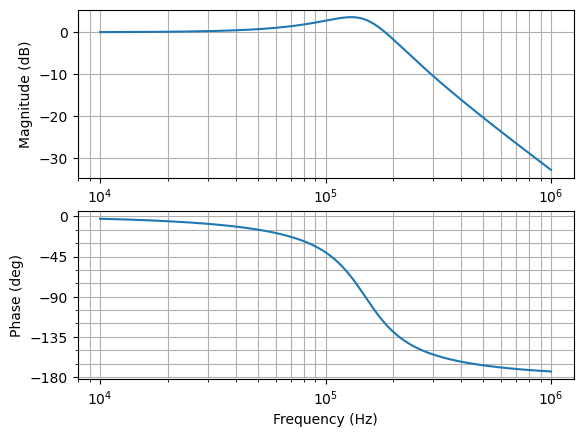

In [9]:
Q_P = 1 / (np.pi*(m_C*(1-D) - 0.5))
omega_N = np.pi*F_SW
H_H = 1 / (1 + s/(omega_N*Q_P) + (s/omega_N)*(s/omega_N))
Gmag, Gphase, Gomega = ct.bode_plot(H_H, dB = True, Hz = True)

In [10]:
print("f_N = {0:1.3g} Hz".format(1/(2*np.pi) * omega_N))

f_N = 1.5e+05 Hz


# Control-to-output_transfer_function

Plant transfer function:

$$ H(s) = H_{DC}(s) H_P(s) H_Z(s) H_H(s) $$

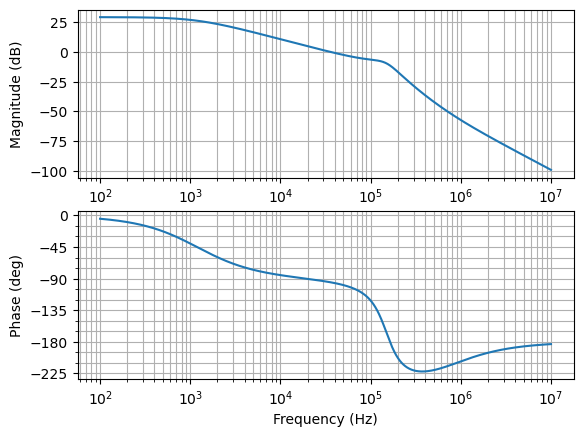

In [11]:
H = H_DC*H_P*H_Z*H_H
Gmag, Gphase, Gomega = ct.bode_plot(H, dB = True, Hz = True)

# References
[Richtek_AN028] "Compensation Design for Peak Current-Mode Buck Converters", Richtek Technology Corporation, Apr 2014

[Control] "Python Control Systems Library", https://python-control.readthedocs.io/en/0.9.4/


# Appendix_A-Richtek_AN028_Example

In [19]:
V_IN = 12                         # [V], input voltage
V_OUT = 3.3                       # [V], output voltage
I_LOAD = 3                        # [A], load current
R_LOAD = V_OUT/I_LOAD             # [Ω], load resistance
F_SW = 340e3                      # [Hz], switch frequency
T_SW = 1/F_SW                     # [s], switch period
D = V_OUT/V_IN                    # Steady-state duty cycle

# COMPONENTS
L = 10e-6                         # [H], switch inductor inductance
C_OUT = 44e-6                     # [F], output capacitor capacitance
R_C = 5e-3                        # [Ω], output capacitor ESR
R_SENSE = 1/5.2                     # [Ω], switch current sense reistance

# SLOPE COMPENSATION
S_N = (V_IN-V_OUT)*R_SENSE / L    # Inductor current slope during on-time
S_E = 507e-3/T_SW                 # External slope compensation
m_C = 1 + S_E/S_N                 # Slope compensation factor

In [20]:
H_DC = R_LOAD/R_SENSE * 1 / (1 + R_LOAD*T_SW/L * (m_C*(1-D) - 0.5))
print("H_DC = {0:1.3g} dB".format(20*np.log10(H_DC)))

H_DC = 12.8 dB


In [21]:
omega_P = 1 / (R_LOAD*C_OUT) + T_SW/(L*C_OUT) *  (m_C*(1-D)-0.5)
H_P = 1 / (1 + s/omega_P)
print("f_P = {0:1.3g} Hz".format(1/(2*np.pi) * omega_P))

f_P = 4.32e+03 Hz


In [22]:
omega_Z = 1 / (R_C * C_OUT)
H_Z = 1 + s/omega_Z
print("f_P = {0:1.3g} Hz".format(1/(2*np.pi) * omega_Z))

f_P = 7.23e+05 Hz


In [23]:
Q_P = 1 / (np.pi*(m_C*(1-D) - 0.5))
omega_N = np.pi*F_SW
H_H = 1 / (1 + s/(omega_N*Q_P) + (s/omega_N)*(s/omega_N))
print("f_N = {0:1.3g} Hz".format(1/(2*np.pi) * omega_N))

f_N = 1.7e+05 Hz


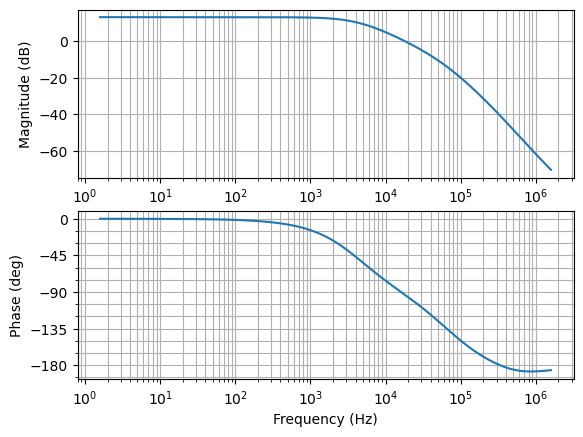

In [27]:
H = H_DC*H_P*H_Z*H_H
Gmag, Gphase, Gomega = ct.bode_plot(H, dB = True, Hz = True, omega_limits = [10, 1e7])